# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [9]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [10]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [11]:
#  1. Get the total rides for each city type
total_rides_by_type = pyber_data_df.groupby("type")["ride_id"].count()
total_rides_by_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [35]:
# 2. Get the total drivers for each city type
total_drivers_by_type = city_data_df.groupby("type")["driver_count"].sum()
total_drivers_by_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [36]:
#  3. Get the total amount of fares for each city type
sum_of_fares_by_type = pyber_data_df.groupby("type")["fare"].sum()
sum_of_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [37]:
#  4. Get the average fare per ride for each city type. 
avg_fare_per_ride_by_type = sum_of_fares_by_type / total_rides_by_type

In [38]:
# 5. Get the average fare per driver for each city type. 
avg_fare_per_driver_per_type = sum_of_fares_by_type / total_drivers_by_type

In [81]:
#  6. Create a PyBer summary DataFrame. 
summary_df = pd.DataFrame([total_rides_by_type, total_drivers_by_type, sum_of_fares_by_type, avg_fare_per_ride_by_type, avg_fare_per_driver_per_type]).T
summary_df

,ride_id,driver_count,fare,Unnamed 0,Unnamed 1
type,,,,,
Rural,125.0,78,4327.93,34.6234,55.4863
Suburban,625.0,490,19356.3,30.9701,39.5027
Urban,1625.0,2405,39854.4,24.5258,16.5715


In [82]:
#  7. Cleaning up the DataFrame. Delete the index name
summary_df.index.name = None

In [83]:
#  8. Format the columns.
summary_df = summary_df.rename(columns = {"ride_id": "Total Rides", "driver_count" : "Total Drivers", "fare" : "Total Fares", 
                                         "Unnamed 0" : "Average Fare per Ride", "Unnamed 1" : "Average Fare per Driver"})
   

summary_df[['Total Rides', 'Total Drivers']] = summary_df[['Total Rides', 'Total Drivers']].astype(float).astype(int)

summary_df["Total Fares"]  = summary_df["Total Fares"].map("${:,.2f}".format)

summary_df["Average Fare per Ride"]  = summary_df["Average Fare per Ride"].map("${:,.2f}".format)
           
summary_df["Average Fare per Driver"]  = summary_df["Average Fare per Driver"].map("${:,.2f}".format)           

summary_df   

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [84]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [102]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#deliv_2_list = ["type", "date"]
#deliv_2_df = pyber_data_df.groupby(deliv_2_list)["fare"].sum()
deliv_2_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
deliv_2_df

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [103]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
deliv_2_df = deliv_2_df.reset_index()
deliv_2_df

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [110]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
deliv_2_pivot_df = deliv_2_df.pivot(index = "date", columns = "type", values = "fare")
deliv_2_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [112]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.

deliv_2_pivot_df.loc[(deliv_2_pivot.index >= '2019-01-01 00:00:00') & (deliv_2_pivot.index < '2019-04-30 00:00:00')]

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-29 20:54:19,NaN,NaN,28.41
2019-04-29 21:20:41,NaN,NaN,13.59
2019-04-29 22:08:22,NaN,25.75,NaN


In [113]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
deliv_2_pivot_df.index = pd.to_datetime(deliv_2_pivot_df.index)

In [118]:
# 7. Check that the datatype for the index is datetime using df.info()
deliv_2_pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2375 entries, 2019-01-01 00:08:16 to 2019-05-08 13:10:18
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  625 non-null    float64
 2   Urban     1625 non-null   float64
dtypes: float64(3)
memory usage: 74.2 KB


In [120]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
deliv_2_by_week_df = deliv_2_pivot_df.resample("W").sum()
deliv_2_by_week_df

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


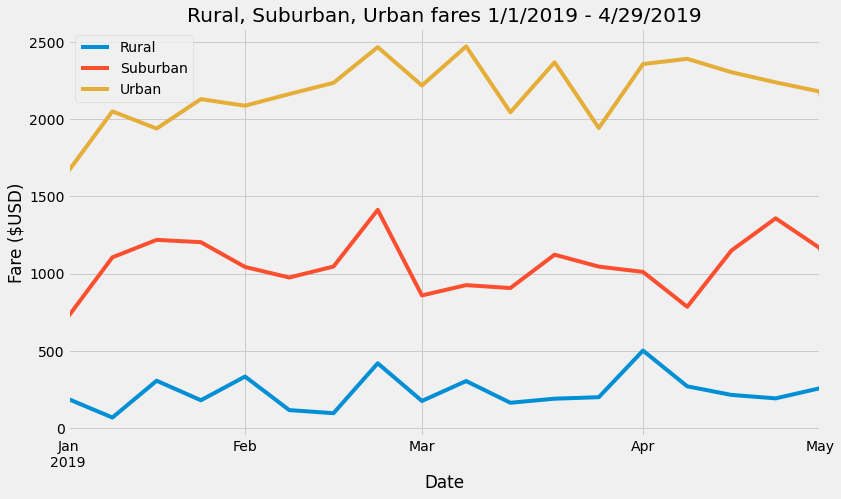

In [156]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')


deliv_2_by_week_df.plot(figsize=(12,7), ylabel="Fare ($USD)", xlabel="Date", title = "Rural, Suburban, Urban fares 1/1/2019 - 4/29/2019",
                        xlim=(pd.Timestamp('2019-01-01 00:00:00'), pd.Timestamp('2019-04-29 00:00:00'))).legend(loc="best").get_figure().savefig("annotated_chart.png")

plt.show()